In [1]:
%matplotlib inline
import os
import numpy as np
import tensorflow as tf

from skimage.restoration import denoise_tv_chambolle,denoise_bilateral
from skimage.restoration import  denoise_tv_bregman# some coul not be imported
from skimage import  filter
from skimage import color

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [3]:


#Import Keras.
from keras.models import model_from_json
from matplotlib import pyplot
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Input, Flatten, Activation
from keras.layers import GlobalMaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.merge import Concatenate
from keras.models import Model
from keras import initializers
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping


from sklearn.cross_validation import train_test_split

Using TensorFlow backend.


In [4]:
def eval(a):
    return -a*np.log(a)- (1-a)*np.log(1-a)

In [5]:
def getModel():
    #Building the model
    gmodel=Sequential()
    #Conv Layer 1
    gmodel.add(Conv2D(16, kernel_size=(3, 3),activation='relu', input_shape=(75, 75, 3)))
    gmodel.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    gmodel.add(Dropout(0.2))

    #Conv Layer 2
    gmodel.add(Conv2D(32, kernel_size=(3, 3), activation='relu' ))
    gmodel.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    gmodel.add(Dropout(0.2))

    #Conv Layer 3
    gmodel.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
    gmodel.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    gmodel.add(Dropout(0.2))

    #Conv Layer 4
    gmodel.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))
    gmodel.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    gmodel.add(Dropout(0.2))

    #Flatten the data for upcoming dense layers
    gmodel.add(Flatten())

    #Dense Layers
    gmodel.add(Dense(512))
    gmodel.add(Activation('relu'))
    gmodel.add(Dropout(0.2))

    #Dense Layer 2
    gmodel.add(Dense(256))
    gmodel.add(Activation('relu'))
    gmodel.add(Dropout(0.2))

    #Sigmoid Layer
    gmodel.add(Dense(1))
    gmodel.add(Activation('sigmoid'))

    mypotim=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    gmodel.compile(loss='binary_crossentropy',
                  optimizer=mypotim,
                  metrics=['accuracy'])
    gmodel.summary()
    return gmodel



In [6]:
def getModel2():
    #Building the model
    gmodel=Sequential()
    #Conv Layer 1
    gmodel.add(Conv2D(64, kernel_size=(3, 3),activation='relu', input_shape=(75, 75, 3)))
    gmodel.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    gmodel.add(Dropout(0.2))

    #Conv Layer 2
    gmodel.add(Conv2D(128, kernel_size=(3, 3), activation='relu' ))
    gmodel.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    gmodel.add(Dropout(0.2))

    #Conv Layer 3
    gmodel.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    gmodel.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    gmodel.add(Dropout(0.2))

    #Conv Layer 4
    gmodel.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    gmodel.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    gmodel.add(Dropout(0.2))

    #Flatten the data for upcoming dense layers
    gmodel.add(Flatten())

    #Dense Layers
    gmodel.add(Dense(512))
    gmodel.add(Activation('relu'))
    gmodel.add(Dropout(0.2))

    #Dense Layer 2
    gmodel.add(Dense(256))
    gmodel.add(Activation('relu'))
    gmodel.add(Dropout(0.2))

    #Sigmoid Layer
    gmodel.add(Dense(1))
    gmodel.add(Activation('sigmoid'))

    mypotim=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    gmodel.compile(loss='binary_crossentropy',
                  optimizer=mypotim,
                  metrics=['accuracy'])
    gmodel.summary()
    return gmodel

In [19]:
def get_callbacks(filepath, patience=2):
    es = EarlyStopping('val_loss', patience=patience, mode="min")
    msave = ModelCheckpoint(filepath, save_best_only=True)
    return [es, msave]# maybe deactivate checkpoint to be faster, maybe change early stopping
file_path = ".model_weights.hdf5"
callbacks = get_callbacks(filepath=file_path, patience=5)

In [8]:
#load data
train = pd.read_json("train.json")
test = pd.read_json("train.json")
X1=np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in train["band_1"]])
X2=np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in train["band_2"]])
X_t= np.concatenate([X1[:, :, :, np.newaxis], X2[:, :, :, np.newaxis],((X1+X2)/2)[:, :, :, np.newaxis]], axis=-1)

In [9]:
target_train=train['is_iceberg']
X_train_cv, X_valid, y_train_cv, y_valid = train_test_split(X_t, target_train, random_state=1, train_size=0.75)

In [18]:
gmodel=getModel()
gmodel.fit(X_train_cv, y_train_cv,
          batch_size=50,
          epochs=20,
          verbose=1,
          validation_data=(X_valid, y_valid),
          callbacks=callbacks,initial_epoch=10)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 73, 73, 16)        448       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 36, 36, 16)        0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 36, 36, 16)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 34, 34, 32)        4640      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 17, 17, 32)        0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 17, 17, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 15, 15, 32)        9248      
__________

In [70]:
gmodel=getModel2()
gmodel.fit(X_train_cv, y_train_cv,
          batch_size=36,
          epochs=30,
          verbose=1,
          validation_data=(X_valid, y_valid),
          callbacks=callbacks)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 73, 73, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [69]:
score = loaded_model.evaluate(X_valid, y_valid, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

401/401 [==============================] - 4s 10ms/step
('Test loss:', 0.31948496902970008)
('Test accuracy:', 0.87780548702748928)


## reduced model
30 epochs:  train acc=87.5, test= 0.84
45 epochs   train acc=86.5, test= 0.85.5

## full model check wheter dropouts are automatically removed
36 epochs train: 89.7% loss 0,22  test: 88.7 % loss=0.26

49 epochs train: 92% loss 0,29  test: 88 % loss=0.29

59 epochs train: 90.5% loss 0,29  test: 89.5 % loss=0.27
70 epochs: hard overfit

In [24]:
eval(0.89)# 0.43 on LB , need at least 0.95

0.34651533691866615

In [22]:
model_json = gmodel.to_json()### save the model
with open("model.json_full_20", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
gmodel.save_weights("model_full.h5")

In [64]:
# load json and create model
json_file = open('model.json_full_36', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model_full_36.h5")


In [65]:
loaded_model.load_weights("model_full_36.h5")

In [66]:
mypotim=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
loaded_model.compile(loss='binary_crossentropy',
                  optimizer=mypotim,
                  metrics=['accuracy'])


In [68]:
hist2=loaded_model.fit(X_train_cv, y_train_cv,
          batch_size=32,
          epochs=50,
          verbose=1,
          validation_data=(X_valid, y_valid),
          callbacks=callbacks,initial_epoch=36)# here we continue with model having already 88% acc.

Train on 1203 samples, validate on 401 samples
Epoch 37/50
1203/1203 [==============================] - 44s 37ms/step - loss: 0.2374 - acc: 0.9002 - val_loss: 0.2754 - val_acc: 0.9102
Epoch 38/50
1203/1203 [==============================] - 44s 36ms/step - loss: 0.2293 - acc: 0.9044 - val_loss: 0.3352 - val_acc: 0.8803
Epoch 39/50
1203/1203 [==============================] - 44s 37ms/step - loss: 0.2411 - acc: 0.8811 - val_loss: 0.3384 - val_acc: 0.8304
Epoch 40/50
1203/1203 [==============================] - 44s 36ms/step - loss: 0.2374 - acc: 0.8919 - val_loss: 0.2995 - val_acc: 0.8753
Epoch 41/50
1203/1203 [==============================] - 44s 36ms/step - loss: 0.2403 - acc: 0.8886 - val_loss: 0.3175 - val_acc: 0.8778
Epoch 42/50
1203/1203 [==============================] - 44s 36ms/step - loss: 0.1998 - acc: 0.9061 - val_loss: 0.3195 - val_acc: 0.8778


In [50]:
def get_callbacks(patience=3):
    es = EarlyStopping('val_loss', patience=patience, mode="min")
    return [ es]# maybe deactivate checkpoint to be faster, maybe change early stopping
callbacks = get_callbacks( patience=5)

['acc', 'loss', 'val_acc', 'val_loss']


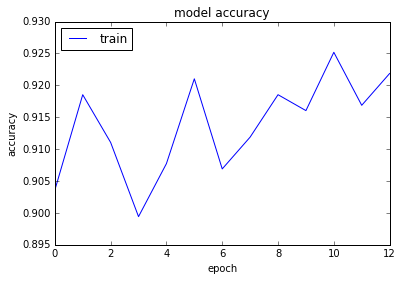

In [57]:
# list all data in history
print(hist.history.keys())
# summarize history for accuracy
plt.plot(hist.history['acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


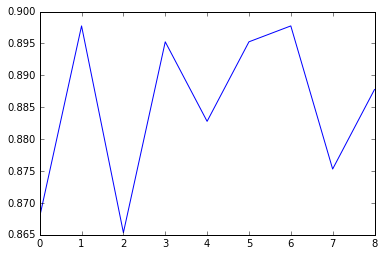

In [31]:
plt.plot(hist.history['val_acc'])

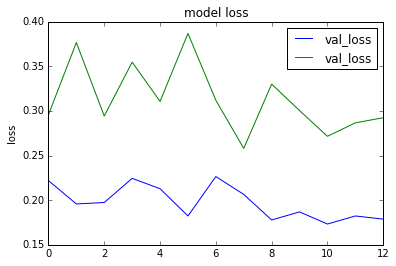

In [62]:
# summarize history for loss
plt.plot(hist.history['loss'],label='val_loss')
plt.plot(hist.history['val_loss'],label='val_loss')
plt.title('model loss')
plt.ylabel('loss')
plt.legend()
plt.show()

In [61]:
model_json = loaded_model.to_json()### save the model
with open("model.json_full_49", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
loaded_model.save_weights("model_full_49.h5")